## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train.shape

(50000, 32, 32, 3)

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    maxi = x.max()
    mini = x.min()
    if (maxi - mini) == 0 :
        x = (x - mini) / 0.1
    x = (x - mini) / (maxi - mini)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
x_train.shape[1:]

(3072,)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp([3072,])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 26s 514us/step - loss: 1.8071 - acc: 0.3513 - val_loss: 1.6964 - val_acc: 0.3977
Epoch 2/30
50000/50000 [==============================] - 25s 498us/step - loss: 1.6779 - acc: 0.3981 - val_loss: 1.6759 - val_acc: 0.4056
Epoch 3/30
50000/50000 [==============================] - 25s 499us/step - loss: 1.5903 - acc: 0.4332 - val_loss: 1.5651 - val_acc: 0.4385
Epoch 4/30
50000/50000 [==============================] - 25s 495us/step - loss: 1.5404 - acc: 0.4489 - val_loss: 1.5416 - val_acc: 0.4467
Epoch 5/30
50000/50000 [==============================] - 25s 499us/step - loss: 1.4858 - acc: 0.4717 - val_loss: 1.5112 - val_acc: 0.4569
Epoch 6/30
50000/50000 [==============================] - 25s 501us/step - loss: 1.4536 - acc: 0.4811 - val_loss: 1.4917 - val_acc: 0.4662
Epoch 7/30
50000/50000 [==============================] - 25s 500us/step - loss: 1.4122 - acc: 0.4961 - val_loss: 1.

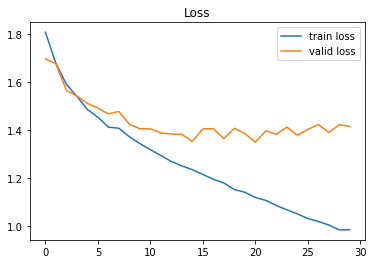

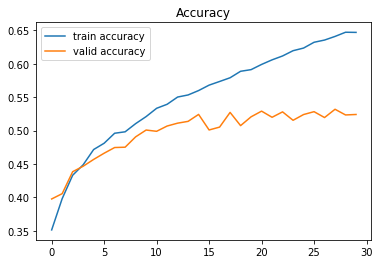

In [17]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()